# Sophia Nicole C. Dayao 2ECE-C
## ECE2112: Python - Exploratory Data Analysis on Spotify 2023 Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## I. Overview of Dataset
### Rows and Columns of the Spotify 2023 Dataset

In [5]:
#load the .csv file into a dataframe
#encode using ISO-8859-1 (Latin-1) since the .csv file has characters that cannot be decoded using utf-8
data = pd.read_csv('spotify-2023.csv',encoding = 'ISO-8859-1')

#set column names
spotify = pd.DataFrame(data,columns = ['track_name','artist(s)_name','artist_count','released_year','released_month',
                                        'released_day','in_spotify_playlists','in_spotify_charts','streams','in_apple_playlists',
                                        'in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts','bpm','key',
                                        'mode','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%',
                                        'liveness_%','speechiness_%'])
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Data Types of the columns of the Spotify 2023 Dataset

In [7]:
#get the data types of each column and rename the columns
dataTypes = pd.DataFrame(spotify.dtypes, columns = ['Data Types']).reset_index()
dataTypes.columns = ['Column Name', 'Data Type']
dataTypes

,Column Name,Data Type
0,track_name,object
1,artist(s)_name,object
2,artist_count,int64
3,released_year,int64
4,released_month,int64
5,released_day,int64
6,in_spotify_playlists,int64
7,in_spotify_charts,int64
8,streams,object
9,in_apple_playlists,int64


## II. Basic Descriptive Statistics
### Mean, Median, and Standard Deviation

In [9]:
#convert the non-numeric numbers in the streams column to perform the pd operations .mean, .median. and .std
spotify['streams'] = pd.to_numeric(spotify['streams'], errors = 'coerce')

#mean of the streams column
streamsMean = spotify['streams'].mean()
print('Mean:', round(streamsMean,2))

#median of the streams column
streamsMedian = spotify['streams'].median()
print('Median:', round(streamsMedian,2))

#standard deviation of the streams columns
streamsStd = spotify['streams'].std()
print('Standard Deviation:', round(streamsStd,2))

Mean: 514137424.94
Median: 290530915.0
Standard Deviation: 566856949.04


### Distribution of Released Year and Artist Count

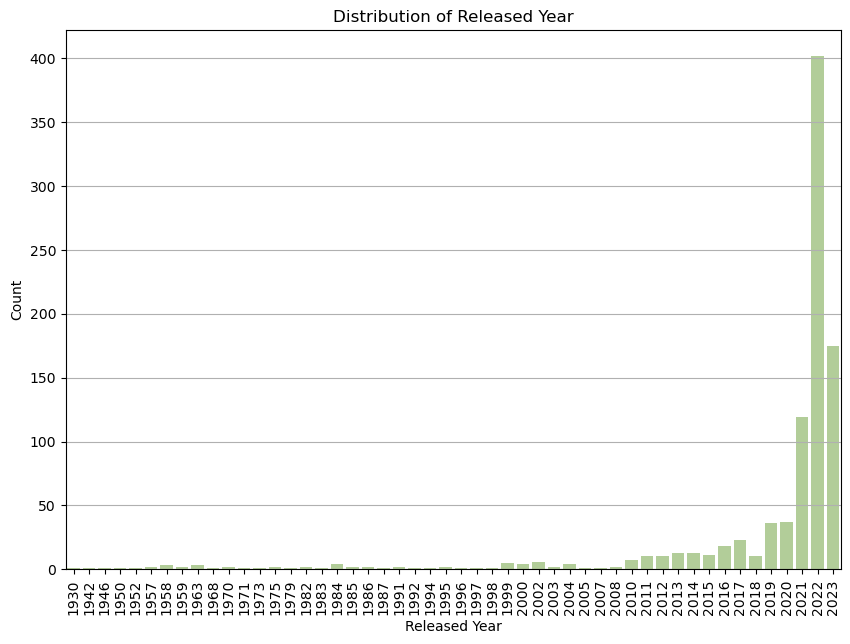

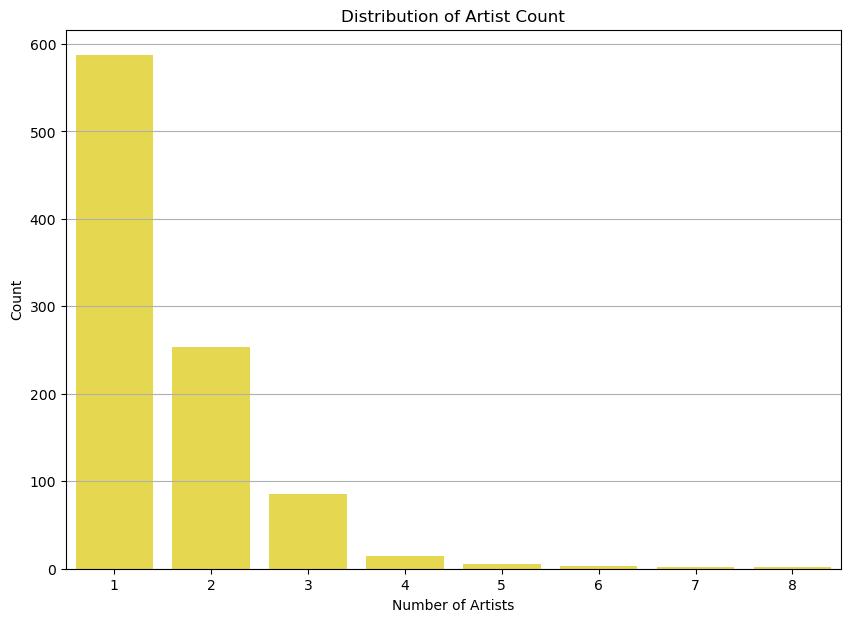

In [11]:
#set the size for both graphs
#graph the distribution of the released_year column
plt.figure(figsize = (10,7))
sns.countplot(x = 'released_year', data = spotify, color = '#B1D690')
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.title('Distribution of Released Year')
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.show()

#graph the distribution of the artist_count column
plt.figure(figsize = (10,7))
sns.countplot(x = 'artist_count', data = spotify, color = '#FEEC37')
plt.title('Distribution of Artist Count')
plt.xlabel('Number of Artists')
plt.ylabel('Count')
plt.grid(axis = 'y')
plt.show()

## III. Top Performers
### Top 5 Most Streamed Tracks

In [13]:
#arrange the tracks according to number of streams in descending value and display the first five
topFiveTracks = spotify[['track_name','streams']].sort_values(by = 'streams', ascending = False).head()
topFiveTracks

,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
620,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


### Top 5 Most Frequent Artists based on the Number of Tracks

In [15]:
#count the occurrences of the artists and display the first five
frequentArtists = spotify['artist(s)_name'].value_counts().head()

#reset the index to convert resulting series into a dataframe
topFiveArtists = frequentArtists.reset_index()

#set the column names
topFiveArtists.columns = ['artist(s)_name','count']
topFiveArtists

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


## IV. Temporal Trends
### Number of Tracks Released per Year

In [17]:
#identify the years with the most released tracks and display the first five
releasedYearTopFive = spotify['released_year'].value_counts().head()

#reset the index to convert resulting series into a dataframe
tracksPerYear = releasedYearTopFive.reset_index()

#set the column names
tracksPerYear.columns = ['released_year','count']
tracksPerYear

,released_year,count
0,2022,402
1,2023,175
2,2021,119
3,2020,37
4,2019,36


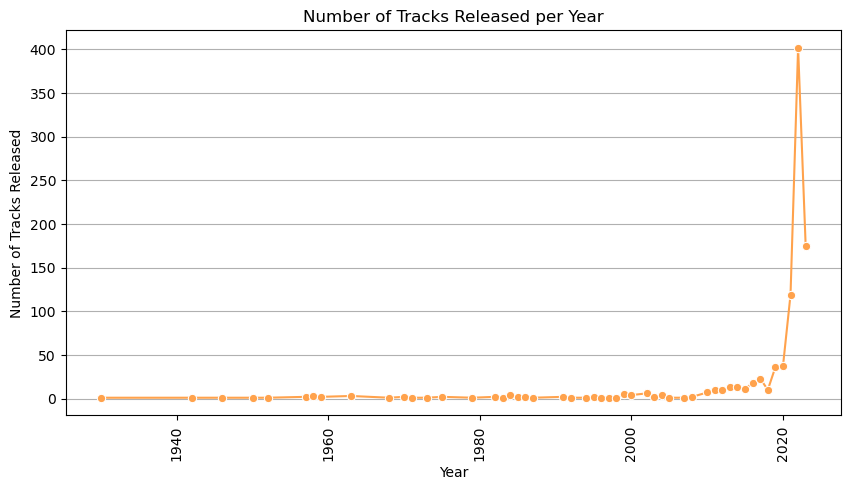

In [18]:
#identify the number of released tracks per year
releasedYear = spotify['released_year'].value_counts().sort_index()

#graph the number of tracks released per year
plt.figure(figsize = (10,5))
sns.lineplot(x = releasedYear.index, y = releasedYear.values, marker = 'o', color = '#FFA24C')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.title('Number of Tracks Released per Year')
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.show()

### Number of Tracks Released per Month

In [93]:
#identify the months with the most released tracks and display the first five
releasedMonthTopFive = spotify['released_month'].value_counts()

#reset the index to convert resulting series into a dataframe
mostTracksPerMonth = releasedMonthTopFive.reset_index()

#set the column names
mostTracksPerMonth.columns = ['released_month','count']
mostTracksPerMonth

,released_month,count
0,1,134
1,5,128
2,3,86
3,6,86
4,11,80
5,12,75
6,10,73
7,4,66
8,7,62
9,2,61


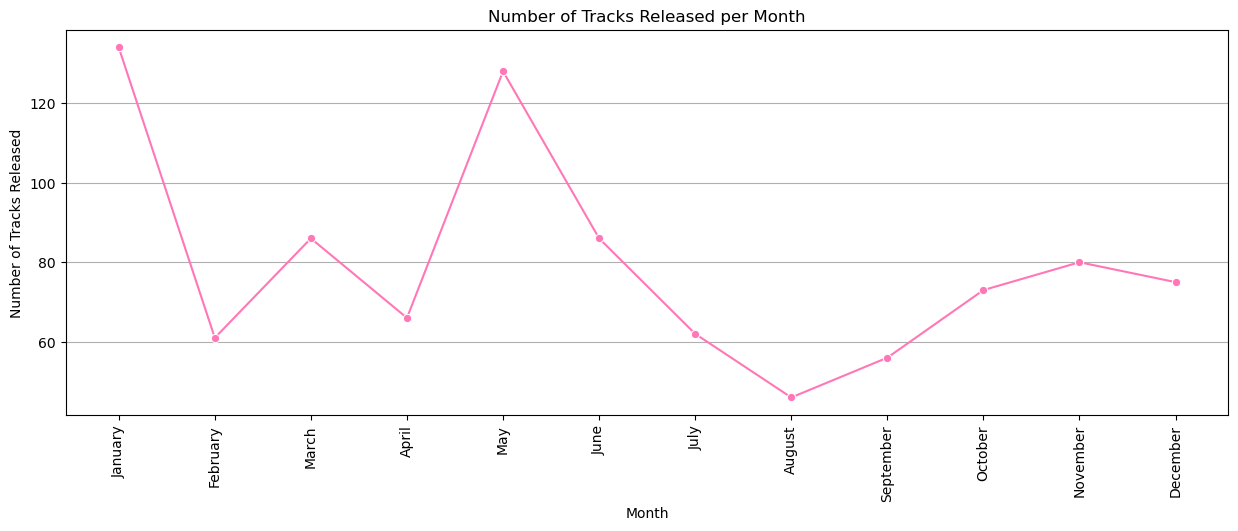

In [21]:
#identify number of released tracks per month
releasedMonth = spotify['released_month'].value_counts().sort_index()

#graph the number of tracks released per year
plt.figure(figsize = (15,5))
sns.lineplot(x = releasedMonth.index, y = releasedMonth.values, marker = 'o', color = '#FF77B7')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.title('Number of Tracks Released per Month')
plt.xticks(ticks = range(1,13), labels = ['January','February','March','April','May','June','July','August',
                                          'September','October','November','December'], rotation = 90)
plt.grid(axis = 'y')
plt.show()

## V. Genre and Music Characteristics
### Correlation between Streams and Musical Attributes

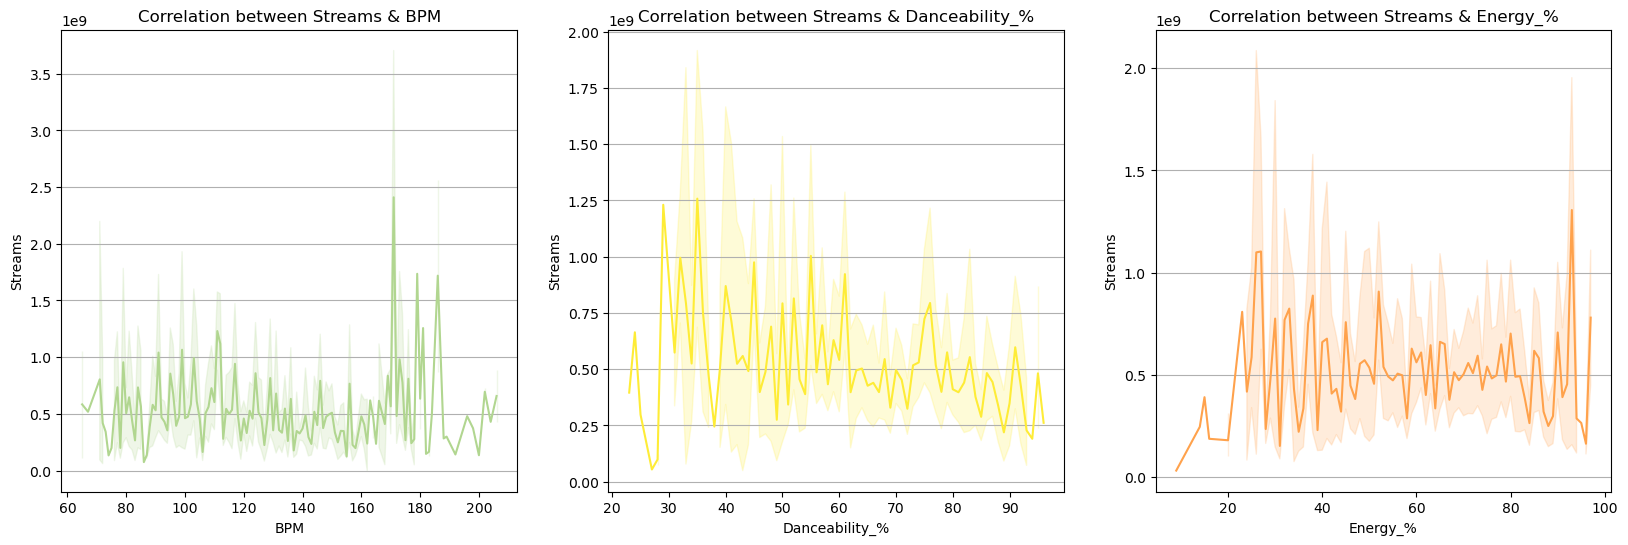

In [23]:
#set the size for all three graphs
plt.figure(figsize = (20,6))

#graph the correlation between streams and bpm
plt.subplot (1,3,1)
sns.lineplot(x = 'bpm', y = 'streams', data = spotify, color = '#B1D690')
plt.xlabel ('BPM')
plt.ylabel ('Streams')
plt.title ('Correlation between Streams & BPM')
plt.grid(axis = 'y')

#graph the correlation between streams and danceability_%
plt.subplot (1,3,2)
sns.lineplot(x = 'danceability_%', y = 'streams', data = spotify, color = '#FEEC37')
plt.xlabel ('Danceability_%')
plt.ylabel ('Streams')
plt.title ('Correlation between Streams & Danceability_%')
plt.grid(axis = 'y')

#graph the correlation between streams and energy_%
plt.subplot (1,3,3)
sns.lineplot(x = 'energy_%', y = 'streams', data = spotify, color = '#FFA24C')
plt.xlabel ('Energy_%')
plt.ylabel ('Streams')
plt.title ('Correlation between Streams & Energy_%')
plt.grid(axis = 'y')

plt.show()

### Correlation between Musical Attributes

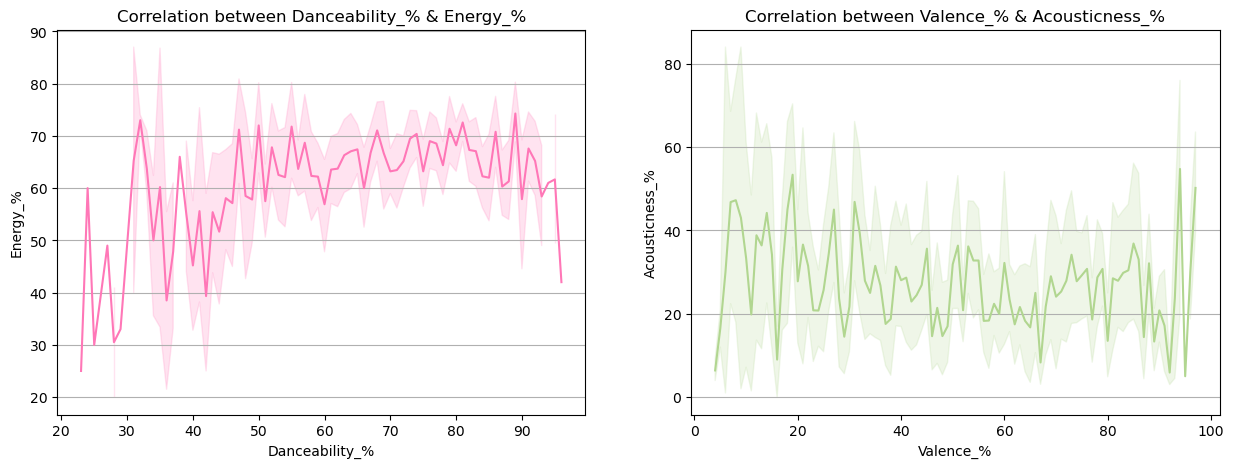

In [25]:
#set the size for both graphs
plt.figure(figsize = (15,5))

#graph the correlation between danceability_% and energy_%
plt.subplot (1,2,1)
sns.lineplot(x = 'danceability_%', y = 'energy_%', data = spotify, color = '#FF77B7')
plt.xlabel ('Danceability_%')
plt.ylabel ('Energy_%')
plt.title ('Correlation between Danceability_% & Energy_%')
plt.grid(axis = 'y')

#graph the correlation between valence_% and acousticness_%
plt.subplot (1,2,2)
sns.lineplot(x = 'valence_%', y = 'acousticness_%', data = spotify, color = '#B1D690')
plt.xlabel ('Valence_%')
plt.ylabel ('Acousticness_%')
plt.title ('Correlation between Valence_% & Acousticness_%')
plt.grid(axis = 'y')

plt.show()

## VI. Platform Popularity

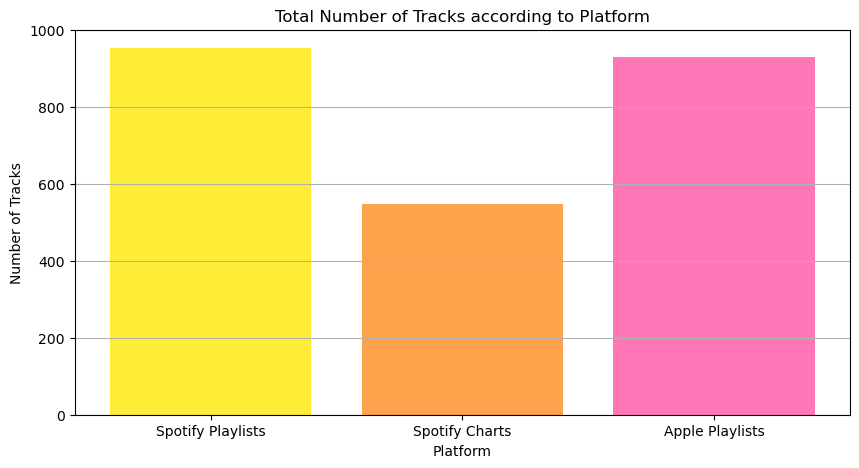

In [31]:
#convert the non-numeric numbers in the following columns to perform the pd operations
convertColumns = ['in_spotify_playlists','in_spotify_charts','in_apple_playlists']
spotify[convertColumns] = spotify[convertColumns].apply(pd.to_numeric, errors = 'coerce')

#count the number of tracks in each platform
spotifyPlaylists = spotify['in_spotify_playlists'].value_counts()
spotifyCharts = spotify['in_spotify_charts'].value_counts()
applePlaylists = spotify['in_apple_playlists'].value_counts()

#find the sums of the tracks in each platform without counting 0 values
spotifyPlaylistsSum = spotifyPlaylists[spotifyPlaylists.index > 0].sum()
spotifyChartsSum = spotifyCharts[spotifyCharts.index > 0].sum()
applePlaylistsSum = applePlaylists[applePlaylists.index > 0].sum()

#group the sums
sums = {'Spotify Playlists': spotifyPlaylistsSum, 'Spotify Charts': spotifyChartsSum, 'Apple Playlists': applePlaylistsSum}

#graph the comparison between platforms
plt.figure(figsize = (10,5))
plt.bar(sums.keys(), sums.values(), color = ['#FEEC37', '#FFA24C', '#FF77B7'])
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')
plt.title('Total Number of Tracks according to Platform')
plt.grid(axis = 'y')
plt.show()

## VII. Advanced Analysis
### Patterns Among Tracks with the Same Key or Mode

In [33]:
#sum the number of streams in each key
keyStreams = spotify.groupby('key')['streams'].sum().sort_index().reset_index()

#arrange the columns
keyStreams.columns = ['Key', 'Total Streams']
keyStreams

,Key,Total Streams
0,A,3.025426e+10
1,A#,3.149110e+10
2,B,4.206718e+10
3,C#,7.251363e+10
4,D,4.289157e+10
5,D#,1.825021e+10
6,E,3.580483e+10
7,F,4.169173e+10
8,F#,3.813251e+10
9,G,4.344954e+10


In [34]:
#sum the number of streams in each mode
modeStreams = spotify.groupby('mode')['streams'].sum().sort_index().reset_index()

#arrange the columns
modeStreams.columns = ['Mode', 'Total Streams']
modeStreams

,Mode,Total Streams
0,Major,2.936232e+11
1,Minor,1.958356e+11


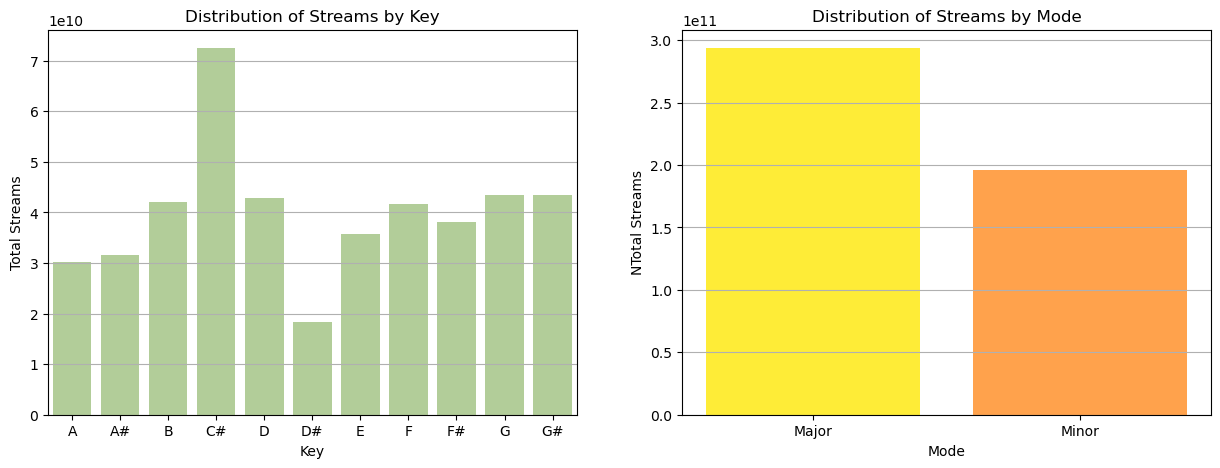

In [39]:
#count the occurrences of the key and allow non-numerical data types
sameKey = spotify.groupby('key')['streams'].sum().sort_index()

#set the size for both graphs
plt.figure(figsize = (15,5))

#graph the patterns among tracks that have the same key
plt.subplot (1,2,1)
sns.countplot(x = sameKey.index, height = sameKey.values, color = '#B1D690')
plt.xlabel('Key')
plt.ylabel('Total Streams')
plt.title('Distribution of Streams by Key')
plt.grid(axis = 'y')

#count the occurrences of the major and minor modes and allow non-numerical data types
sameMode = spotify.groupby('mode')['streams'].sum().sort_index()

#graph the patterns among tracks that have the same mode
plt.subplot (1,2,2)
plt.bar(sameMode.index, sameMode.values, color = ['#FEEC37', '#FFA24C'])
plt.xlabel('Mode')
plt.ylabel('NTotal Streams')
plt.title('Distribution of Streams by Mode')
plt.grid(axis = 'y')

plt.show()

### Most Frequently Appearing Artists in Playlists and Charts

In [82]:
#group together playlists and convert non-numeric values to use pd operations
playlists = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
spotify[playlists] = spotify[playlists].apply(pd.to_numeric, errors='coerce').fillna(0)

#get the sum across spotify, apple, and deezer playlist appearances per artist
artistPlaylists = spotify.groupby('artist(s)_name')[playlists].sum()
artistPlaylists['Total Playlist Appearances'] = artistPlaylists.sum(axis=1)

#create dataframe with artists and total playlist appearances
playlistAppearances = artistPlaylists[['Total Playlist Appearances']].sort_index().reset_index()
playlistAppearances = playlistAppearances.rename(columns={'artist(s)_name': 'Artist(s)'})

#arrange dataframe in descending order and display top 10
topArtistsPlaylists = playlistAppearances.sort_values(by='Total Playlist Appearances', ascending=False).head(10)
topArtistsPlaylists

,Artist(s),Total Playlist Appearances
572,The Weeknd,147868.0
558,Taylor Swift,136478.0
159,Ed Sheeran,131908.0
223,Harry Styles,114250.0
171,Eminem,87806.0
25,Arctic Monkeys,85427.0
111,Coldplay,76902.0
33,Avicii,68648.0
7,Adele,66551.0
141,"Dr. Dre, Snoop Dogg",66011.0


In [84]:
#group together charts and convert non-numeric values to use pd operations
charts = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
spotify[charts] = spotify[charts].apply(pd.to_numeric, errors='coerce').fillna(0)

#get the sum across spotify, apple, deezer, and shazam appearances per artist
artistCharts = spotify.groupby('artist(s)_name')[charts].sum()
artistCharts['Total Chart Appearances'] = artistCharts.sum(axis=1)

#create dataframe with artists and total chart appearances
chartAppearances = artistCharts[['Total Chart Appearances']].sort_index().reset_index()
chartAppearances = chartAppearances.rename(columns={'artist(s)_name': 'Artist(s)'})

#arrange dataframe in descending order and display top 10
topArtistsCharts = chartAppearances.sort_values(by='Total Chart Appearances', ascending=False).head(10)
topArtistsCharts

,Artist(s),Total Chart Appearances
558,Taylor Swift,4277.0
572,The Weeknd,2405.0
43,Bad Bunny,1779.0
498,SZA,1653.0
431,Olivia Rodrigo,1621.0
159,Ed Sheeran,1499.0
418,NewJeans,1341.0
123,"Dave, Central Cee",1267.0
214,Gunna,1257.0
326,"Latto, Jung Kook",1246.0


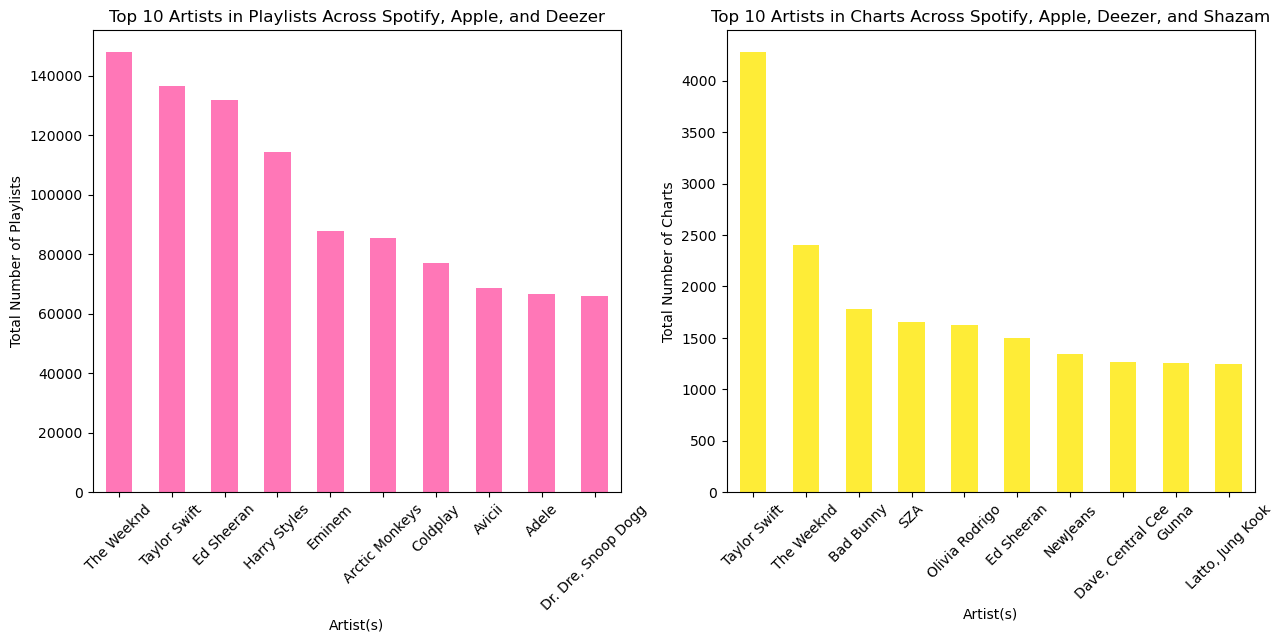

In [60]:
#group together playlists and charts and convert non-numeric values to use pd operations
playlistColumns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
chartColumns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts','in_shazam_charts']
spotify[playlistColumns + chartColumns] = spotify[playlistColumns + chartColumns].apply(pd.to_numeric, errors='coerce').fillna(0)

#get the sum across spotify, apple, and deezer playlist appearances per artist
artistPlaylistCounts = spotify.groupby('artist(s)_name')[playlistColumns].sum()
artistPlaylistCounts['totalPlaylists'] = artistPlaylistCounts.sum(axis=1)

#get the sum across spotify, apple, deezer, and shazam chart appearances per artist
artistChartCounts = spotify.groupby('artist(s)_name')[chartColumns].sum()
artistChartCounts['totalCharts'] = artistChartCounts.sum(axis=1)

#sort total appearances in descending order and display top 10
topArtistsPlaylists = artistPlaylistCounts['totalPlaylists'].sort_values(ascending=False).head(10)
topArtistsCharts = artistChartCounts['totalCharts'].sort_values(ascending=False).head(10)

#set size for both graphs
plt.figure(figsize=(15, 6))

#graph playlist data
plt.subplot(1, 2, 1)
topArtistsPlaylists.plot(kind='bar', color='#FF77B7')
plt.title('Top 10 Artists in Playlists Across Spotify, Apple, and Deezer')
plt.xlabel('Artist(s)')
plt.ylabel('Total Number of Playlists')
plt.xticks(rotation=45)

#graph chart data
plt.subplot(1, 2, 2)
topArtistsCharts.plot(kind='bar', color='#FEEC37')
plt.title('Top 10 Artists in Charts Across Spotify, Apple, Deezer, and Shazam')
plt.xlabel('Artist(s)')
plt.ylabel('Total Number of Charts')
plt.xticks(rotation=45)

plt.show()

# Summary of Answers
## I. Overview of Dataset
### 1. How many rows and columns does the dataset contain?
The dataset contains 953 rows and 24 columns.

### 2. What are the data types of each column? Are there any missing values?
The columns of the dataset are composed of only two data types, which are 'integer’ and 'object'.

## II. Basic Descriptive Statistics
### 1. What are the mean, median, and standard deviation of the streams column?
The mean of the streams column is 514.1 million, its median is 290.5 million, and its standard deviation is 566.9 million.

### 2. What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?
The first graph shows a significant increase in track releases in the 2010s, with a sharp spike from 2021 to 2023, especially in 2022. During the COVID-19 pandemic, artists turned to digital releases since there were tight restrictions on live performances. With easy access to home recording tools and a high demand for new music, many musicians released more tracks during this time to connect with their audiences.

Meanwhile, the second graph shows that most tracks feature a single artist, while the number of tracks decreases as the number of artists involved increases. This suggests that there is a trend toward solo releases or small collaborations, while multi-artist tracks are outliers.

## III. Top Performers
### 1. Which track has the highest number of streams? Display the top 5 most streamed tracks.
The top 5 most streamed tracks are Blinding Lights	with 3.7 billion streams; Shape of You	with 3.6 billion streams; Someone You Loved with 2.89 billion streams; Dance Monkey with 2.86 billion streams; and Sunflower - Spider-Man: Into the Spider-Verse with 2.8 billion streams.

### 2. Who are the top 5 most frequent artists based on the number of tracks in the dataset?
The top 5 most frequent artists are Taylor Swift with 34 tracks, The Weeknd with 22 tracks, Bad Bunny and SZA with 19 tracks each, and Harry Styles with 17 tracks.

## IV. Temporal Trends
### 1. Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
The line graph begins to rise somewhere between the years 2000 and 2020, suggesting that there is an increase in the number of released tracks during the 2010s. It can be seen that there is a noticeable spike after the year 2020, particularly in 2022, with 402 released tracks.

### 2. Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?
The line graph indicates that the number of tracks released varies per month. Months like January (134 tracks) and May (128 tracks) have the highest number of tracks released, while August (64 tracks) has the lowest number of released tracks. While the fluctuations are clearly captured by the line graph, there does not appear to be any consistent trend over the span of one year.

## V. Genre and Music Characteristics
### 1. Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
The line graphs show that none of these attributes show a clear or strong correlation with streams. There are some significant peaks in each graph, but they do not follow a predictable pattern for any specific attribute. This suggests that streams are not significantly influenced by bpm, danceability_%, and energy_%.

### 2. Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?
The first line graph shows that there is a slightly positive correlation between danceability_% and energy_%, as it can be seen that danceability_% increases as energy_% also increases. Meanwhile, there seems to be little to no correlation between valence_% and acousticness_% since there is no clear trend seen in the second line graph.

## VI. Platform Popularity
### 1. How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?
The bar graph indicates that Spotify Playlists have the most tracks, suggesting Spotify users are more inclined to curate their playlists. Apple Playlists also has a high track count, showing that many users actively engage with this platform. In contrast, Spotify Charts have fewer tracks. Generally, both Spotify and Apple platforms have a significant amount of playlist engagement, but Spotify Playlists seem to be more preferred by the typical listener.

## VII. Advanced Analysis
### 1. Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
Based on the first bar graph, C# is the most favored key, with 72.5 billion streams. Meanwhile, D# is the least preferred by listeners, with 18.3 billion streams. Songs with keys B, D, F, G, and G# are also among the most listened to after C#, with over 40 billion streams.

As seen in the second bar graph, listeners are more inclined to stream tracks with the major mode, with a total of 293.6 billion streams, compared to the minor mode, with 195.8 billion streams. The gap of almost 100 billion indicates that listeners might be more inclined to stream more upbeat, major key tracks.

### 2. Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.
The playlists and charts across different are both dominated by the same artists. The Weeknd has a total of 147868 playlist appearances, followed by Taylor Swift with 136478 playlist appearances. On the other hand, Taylor Swift leads the charts with 4277 appearances, followed by The Weeknd with 2405 appearances. This suggests that both entertainers connect with a wide range of audiences regardless of the listening platform. Similarly, Ed Sheeran appears in the top 10 of both categories despite being in different ranks (131908 playlist appearances and 1499 chart appearances), which is still a good indicator of his popularity among listeners across various platforms.

